In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# TODO
display rank at given time\
plot ranks of a person over time\
print k where they are kth person to solve a problem\
time to solve distributions for each time
print scoreboard at a specific time (low priority)


In [19]:
filename = "23locals.txt"
contest_length = 300


In [20]:
f = open(filename, "r")
contest_title = f.readline().strip()
date = f.readline().strip()
f.readline()
f.readline()
header = f.readline().strip()
header = header.split()
num_problems = len(header) - 7
print(num_problems)
# print(">" + contest_title + "<")
# print(date)
problem_names = header[7:]
print(problem_names)
names = [] # names of each person
ranks = {} # rank of each person
attempts = {} # data on solves of each person
solves = {} # number of problems solved for each person
penalties = {} # penalty points for each person
states = {} # [solved, penalty] over time for each person

for contestant in f:
    data = contestant.strip().split()
    if not data[0].isnumeric():
        continue # unranked
    rank = int(data[0])
    name = []
    solve_data = []
    solved = 0
    penalty = 0
    for i in range(1, len(data)):
        if data[i].isnumeric():
            solve_data = data[i + 2:]
            solved = int(data[i])
            penalty = int(data[i + 1])
            break
        name.append(data[i])
    name = " ".join(name)
    names.append(name)
    assert(len(solve_data) == 2 * num_problems)
    solve_arr = []
    for i in range(0, len(solve_data), 2):
        attempt = [int(solve_data[i]), 0]
        if solve_data[i + 1] == '....':
            attempt[1] = contest_length + 1
        else:
            d = solve_data[i + 1].split(":")
            attempt[1] = 60 * int(d[0]) + int(d[1])
        solve_arr.append(attempt)
    ranks[name] = rank
    solves[name] = solved
    penalties[name] = penalty
    attempts[name] = solve_arr
    time_data = []
    cur_solves = 0
    cur_penalty = 0
    for t in range(contest_length + 1):
        for i in range(num_problems):
            submissions, time = solve_arr[i]
            if time == t:
                cur_solves += 1
                cur_penalty += (submissions - 1) * 20 + time
        time_data.append([cur_solves, cur_penalty])
    assert(cur_penalty == penalty)
    assert(cur_solves == solved)
    states[name] = time_data
f.close()


12
['lucky', 'happy', 'snail', 'goalie', 'mvp', 'land', 'notsoclose', 'duel', 'drake', 'gmcr', 'bunny', 'rope']


In [21]:
from functools import cmp_to_key
reference_time = 0

def cmp_state(name1, name2):
    global reference_time, states
    state1 = states[name1][reference_time]
    state2 = states[name2][reference_time]
    if state1[0] != state2[0]:
        return state2[0] - state1[0]
    return state1[1] - state2[1]
ranks_over_time = {}
for name in names:
    ranks_over_time[name] = []
for t in range(contest_length + 1):
    reference_time = t
    names.sort(key=cmp_to_key(cmp_state))
    rank = 0
    fake_rank = 0
    for i, name in enumerate(names):
        fake_rank += 1
        if i > 0 and cmp_state(names[i-1], name) == 0:
            pass
        else:
            rank = fake_rank
        ranks_over_time[name].append(rank)


In [22]:
def avg_rank(name):
    rank_list = ranks_over_time[name]
    return sum(rank_list) / len(rank_list)


In [23]:
# plots the rank over time graph of one or more candidates
def plot_rank_over_time(names):
    if type(names) != list:
        names = [names]
    fig, ax = plt.subplots(1,1)
    plt.xlabel("Time")
    plt.ylabel("Rank")
    plt.title("Rank over Time")
    for name in names:
        rank_list = ranks_over_time[name]
        ax.plot(rank_list, label=name)
        print("Average Rank for %s is %.2f" % (name, avg_rank(name)))
    plt.legend()


In [24]:
def cmp_avg(name1, name2):
    global avg_rank
    return avg_rank(name1) - avg_rank(name2)
names.sort(key=cmp_to_key(cmp_avg))
avg_rank_dict = {}
for i in names:
    avg_rank_dict[i] = avg_rank(i)
for i in names[:10]:
    print("%s's Average Rank: %.2f" % (i, avg_rank(i)))


Andy Phan's Average Rank: 1.00
Sachin Sivakumar's Average Rank: 2.26
Sathvik Kuthuru's Average Rank: 4.87
Lior Arin Barak's Average Rank: 5.57
Tyler Marks's Average Rank: 6.19
Cameron Custer's Average Rank: 6.28
Aviv Brian Barak's Average Rank: 7.52
Natalie Longtin's Average Rank: 7.82
Chris Gittings's Average Rank: 8.64
Juan Moscoso's Average Rank: 9.72


In [25]:
print(avg_rank_dict["Thomas Meeks"])


18.9468438538206


Average Rank for Aviv Brian Barak is 7.52
Average Rank for Lior Arin Barak is 5.57


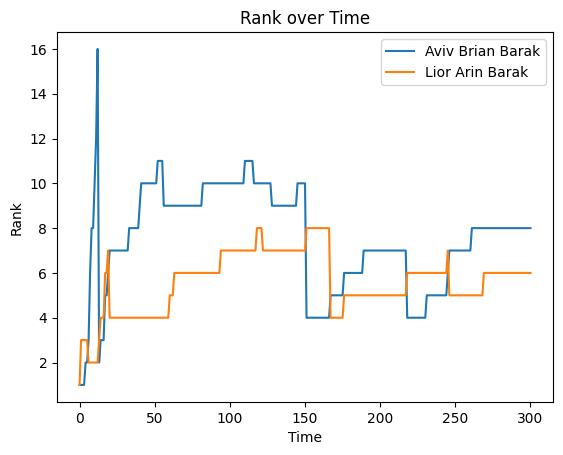

In [26]:
plot_rank_over_time(["Aviv Brian Barak", "Lior Arin Barak"])


Average Rank for Benjamin Prins is 17.63
Average Rank for Thomas Meeks is 18.95
Average Rank for Juan Moscoso is 9.72


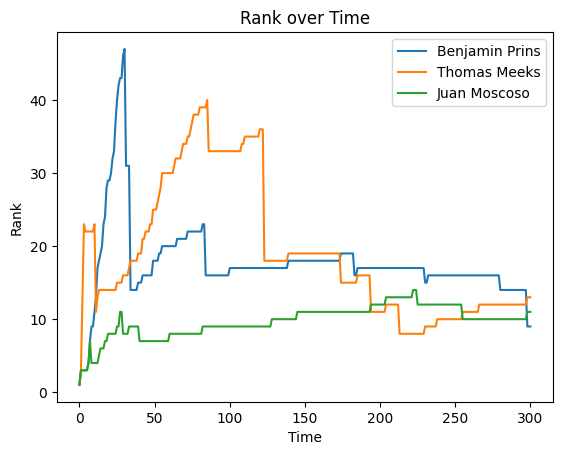

In [27]:
plot_rank_over_time(["Benjamin Prins", "Thomas Meeks", "Juan Moscoso"])


Average Rank for Andy Phan is 1.00
Average Rank for Sachin Sivakumar is 2.26
Average Rank for Cameron Custer is 6.28
Average Rank for Sathvik Kuthuru is 4.87
Average Rank for Tyler Marks is 6.19
Average Rank for Natalie Longtin is 7.82
Average Rank for Chris Gittings is 8.64


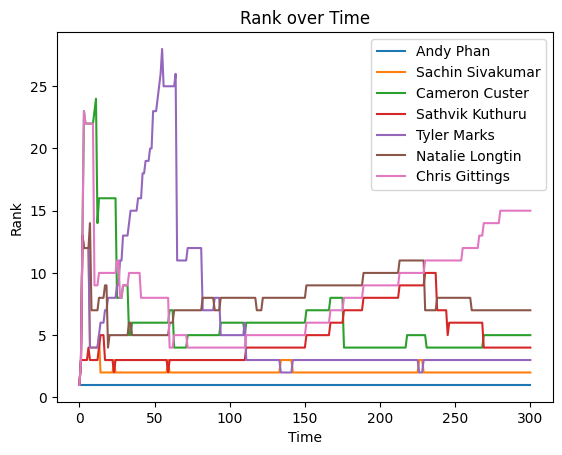

In [28]:
plot_rank_over_time(["Andy Phan", "Sachin Sivakumar", "Cameron Custer", "Sathvik Kuthuru", "Tyler Marks", "Natalie Longtin", "Chris Gittings"])


Average Rank for Sachin Sivakumar is 2.26
Average Rank for Tyler Marks is 6.19


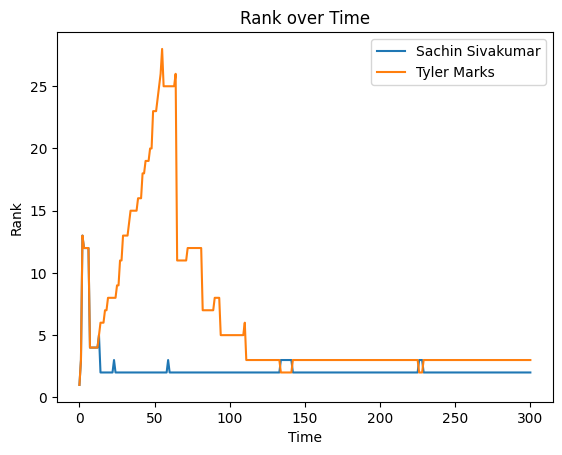

In [29]:
plot_rank_over_time(["Sachin Sivakumar", "Tyler Marks"])
